# WebScraping TV DataCleaning & EDA

### Importing WebScrapingTVs.csv file for data cleaning 

In [83]:
import pandas as pd
import missingno as mino
import matplotlib.pyplot as plt

In [39]:
df_TV = pd.read_csv('WebScrapingTVs.csv')

In [40]:
df_TV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Name      172 non-null    object 
 1   Supported Apps    172 non-null    object 
 2   OS                172 non-null    object 
 3   Resolution        172 non-null    object 
 4   Speaker Output    172 non-null    object 
 5   Refresh Rate      172 non-null    object 
 6   Rating            172 non-null    float64
 7   Original Price    172 non-null    int64  
 8   Discounted Price  172 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 12.2+ KB


## Data Cleaning

#### Converting Discounted Price & Original Price to float datatype

In [41]:
df_TV['Discounted Price']=df_TV['Discounted Price'].astype(float)
df_TV['Original Price']=df_TV['Original Price'].astype(float)
df_TV['Rating']=df_TV['Rating'].astype(float)

In [42]:
df_TV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Name      172 non-null    object 
 1   Supported Apps    172 non-null    object 
 2   OS                172 non-null    object 
 3   Resolution        172 non-null    object 
 4   Speaker Output    172 non-null    object 
 5   Refresh Rate      172 non-null    object 
 6   Rating            172 non-null    float64
 7   Original Price    172 non-null    float64
 8   Discounted Price  172 non-null    float64
dtypes: float64(3), object(6)
memory usage: 12.2+ KB


#### Checking for uniques values in the columns of the dataframe to see the miss match of any data

In [43]:
df_TV.columns

Index(['Product Name', 'Supported Apps', 'OS', 'Resolution', 'Speaker Output',
       'Refresh Rate', 'Rating', 'Original Price', 'Discounted Price'],
      dtype='object')

In [44]:
print('Supported Apps \n \n' , df_TV['Supported Apps'].unique())
print('OS \n \n' , df_TV['OS'].unique())
print('Resolution \n \n' , df_TV['Resolution'].unique())
print('Speaker Output \n \n' , df_TV['Speaker Output'].unique())
print('Refresh Rate \n \n' , df_TV['Refresh Rate'].unique())

Supported Apps 
 
 ['Netflix|Prime Video|Disney+Hotstar|Youtube'
 'Netflix|Disney+Hotstar|Youtube' 'Netflix|Prime Video|Youtube'
 'Netflix|Prime Video|Apple TV|Disney+Hotstar|Youtube' 'Netflix|Youtube'
 'Disney+Hotstar|Youtube' 'Prime Video|Disney+Hotstar|Youtube' 'Youtube'
 'Operating System: Tizen']
OS 
 
 ['Operating System: Android' 'Operating System: VIDAA'
 'Operating System: Tizen' 'Operating System: Android Based'
 'Operating System: Linux based' 'Operating System: Linux'
 'Ultra HD (4K) 3840 x 2160 Pixels' 'Ultra HD (4K) 3840x2160 Pixels']
Resolution 
 
 ['Ultra HD (4K) 3840 x 2160 Pixels' 'Ultra HD (4K) 3840 × 2160 Pixels'
 'Ultra HD (4K) 1920 x 1080 Pixels' '16 W Speaker Output'
 '40 W Speaker Output' '20 W Speaker Output']
Speaker Output 
 
 ['30 W Speaker Output' '24 W Speaker Output' '48 W Speaker Output'
 '20 W Speaker Output' '24W Speaker Output' '50 W Speaker Output'
 '39 W Speaker Output' '40 W Speaker Output' '16 W Speaker Output'
 '60 Hz Refresh Rate' '200 Hz Refres

#### Checking the miss match of data in the "Supported Apps" column

In [45]:
if any("Operating System" in word for word in df_TV["Supported Apps"]):
    print("Operating System is present in Supported Apps") 
else:
    print("Operating System is not present")

Operating System is present in Supported Apps


In [46]:
display(df_TV.loc[(df_TV["Supported Apps"] == "Operating System: Tizen")])

,Product Name,Supported Apps,OS,Resolution,Speaker Output,Refresh Rate,Rating,Original Price,Discounted Price
128,SAMSUNG 123 cm (49 inch) Ultra HD (4K) LED Sma...,Operating System: Tizen,Ultra HD (4K) 3840x2160 Pixels,40 W Speaker Output,200 Hz Refresh Rate,4 x HDMI | 3 x USB,4.4,179900.0,85000.0
144,SAMSUNG 125 cm (50 inch) Ultra HD (4K) LED Sma...,Operating System: Tizen,Ultra HD (4K) 3840x2160 Pixels,20 W Speaker Output,200 Hz Refresh Rate,3 x HDMI | 2 x USB,4.3,125900.0,89990.0


#### Checking if shifting the row values could correct the column values

In [47]:
df_TV.loc[[128]].iloc[:,1:6].shift(periods=1,axis=1)

,Supported Apps,OS,Resolution,Speaker Output,Refresh Rate
128,NaN,Operating System: Tizen,Ultra HD (4K) 3840x2160 Pixels,40 W Speaker Output,200 Hz Refresh Rate


In [25]:
df_TV.loc[[144]].iloc[:,1:6].shift(periods=1,axis=1)

,Supported Apps,OS,Resolution,Speaker Output,Refresh Rate
144,NaN,Operating System: Tizen,Ultra HD (4K) 3840x2160 Pixels,20 W Speaker Output,200 Hz Refresh Rate


In [48]:
# updating missing column value "Supported Apps" as unkown
df_TV.loc[(df_TV["Supported Apps"].isin(["Operating System: Tizen"])), "Supported Apps"] = "Unknown"

# Shifting the row values
df_TV.loc[(df_TV["OS"].isin(["Ultra HD (4K) 3840x2160 Pixels"])), "OS"] = "Operating System: Tizen"
df_TV.loc[(df_TV["Resolution"].isin(["20 W Speaker Output","40 W Speaker Output"])), "Resolution"] = "Ultra HD (4K) 3840x2160 Pixels"
df_TV.loc[(df_TV["Refresh Rate"].isin(["4 x HDMI | 3 x USB","3 x HDMI | 2 x USB"])), "Refresh Rate"] = "200 Hz Refresh Rate"

In [49]:
df_TV.iloc[128,4] = "40 W Speaker Output"
df_TV.iloc[144,4] = "20 W Speaker Output"

#### Checking if the data looks clean after shifting the values

In [50]:
df_TV.loc[[128]]

,Product Name,Supported Apps,OS,Resolution,Speaker Output,Refresh Rate,Rating,Original Price,Discounted Price
128,SAMSUNG 123 cm (49 inch) Ultra HD (4K) LED Sma...,Unknown,Operating System: Tizen,Ultra HD (4K) 3840x2160 Pixels,40 W Speaker Output,200 Hz Refresh Rate,4.4,179900.0,85000.0


In [51]:
df_TV.loc[[144]]

,Product Name,Supported Apps,OS,Resolution,Speaker Output,Refresh Rate,Rating,Original Price,Discounted Price
144,SAMSUNG 125 cm (50 inch) Ultra HD (4K) LED Sma...,Unknown,Operating System: Tizen,Ultra HD (4K) 3840x2160 Pixels,20 W Speaker Output,200 Hz Refresh Rate,4.3,125900.0,89990.0


#### Checking for any more miss match present

In [52]:
display(df_TV.loc[(df_TV["OS"] == "Ultra HD (4K) 3840 x 2160 Pixels")])

,Product Name,Supported Apps,OS,Resolution,Speaker Output,Refresh Rate,Rating,Original Price,Discounted Price
121,ONIDA Live Genius 107.95 cm (42.5 inch) Ultra ...,Youtube,Ultra HD (4K) 3840 x 2160 Pixels,16 W Speaker Output,60 Hz Refresh Rate,200 Hz Refresh Rate,4.1,49990.0,29799.0


In [53]:
# updating missing column value "OS" as unkown
df_TV.loc[(df_TV["OS"].isin(["Ultra HD (4K) 3840 x 2160 Pixels"])), "OS"] = "Unknown"

# Shifting the row values
df_TV.loc[(df_TV["Resolution"].isin(["16 W Speaker Output"])), "Resolution"] = "Ultra HD (4K) 3840 x 2160 Pixels"
df_TV.loc[(df_TV["Speaker Output"].isin(["60 Hz Refresh Rate"])), "Speaker Output"]="16 W Speaker Output"
df_TV.loc[(df_TV["Refresh Rate"].isin(["200 Hz Refresh Rate"])), "Refresh Rate"] = "60 Hz Refresh Rate"   

In [54]:
df_TV.loc[[121]]

,Product Name,Supported Apps,OS,Resolution,Speaker Output,Refresh Rate,Rating,Original Price,Discounted Price
121,ONIDA Live Genius 107.95 cm (42.5 inch) Ultra ...,Youtube,Unknown,Ultra HD (4K) 3840 x 2160 Pixels,16 W Speaker Output,60 Hz Refresh Rate,4.1,49990.0,29799.0


#### Checking if the column values looks cleaned

In [55]:
print('Supported Apps \n \n' , df_TV['Supported Apps'].unique())
print('OS \n \n' , df_TV['OS'].unique())
print('Resolution \n \n' , df_TV['Resolution'].unique())
print('Speaker Output \n \n' , df_TV['Speaker Output'].unique())
print('Refresh Rate \n \n' , df_TV['Refresh Rate'].unique())

Supported Apps 
 
 ['Netflix|Prime Video|Disney+Hotstar|Youtube'
 'Netflix|Disney+Hotstar|Youtube' 'Netflix|Prime Video|Youtube'
 'Netflix|Prime Video|Apple TV|Disney+Hotstar|Youtube' 'Netflix|Youtube'
 'Disney+Hotstar|Youtube' 'Prime Video|Disney+Hotstar|Youtube' 'Youtube'
 'Unknown']
OS 
 
 ['Operating System: Android' 'Operating System: VIDAA'
 'Operating System: Tizen' 'Operating System: Android Based'
 'Operating System: Linux based' 'Operating System: Linux' 'Unknown']
Resolution 
 
 ['Ultra HD (4K) 3840 x 2160 Pixels' 'Ultra HD (4K) 3840 × 2160 Pixels'
 'Ultra HD (4K) 1920 x 1080 Pixels' 'Ultra HD (4K) 3840x2160 Pixels']
Speaker Output 
 
 ['30 W Speaker Output' '24 W Speaker Output' '48 W Speaker Output'
 '20 W Speaker Output' '24W Speaker Output' '50 W Speaker Output'
 '39 W Speaker Output' '40 W Speaker Output' '16 W Speaker Output'
 '45 W Speaker Output']
Refresh Rate 
 
 ['60 Hz Refresh Rate' '120 Hz Refresh Rate' '64 Hz Refresh Rate'
 '100 Hz Refresh Rate' '50 Hz Refresh R

#### Extracting Screen Size and Converting to Float

In [64]:
df_TV['Screen Size'] = df_TV["Product Name"].str.extract('(\\(.*?)\\)', expand=False).str.strip()
df_TV['Screen Size'] = df_TV['Screen Size'].str.replace("(","")
df_TV['Screen Size'] = df_TV['Screen Size'].str.extract(r'(\d{2})', expand=False).str.strip()

In [65]:
df_TV['Screen Size'][1]

'55'

In [66]:
df_TV['Screen Size']=df_TV['Screen Size'].astype(float)

#### Extracting Brand Name and Capitalizing

In [67]:
df_TV['Brand Name'] = df_TV['Product Name'].str.extract(r'([A-Za-z]+\s)', expand=False).str.strip()

In [70]:
df_TV['Brand Name'][0]

'Vu'

In [71]:
df_TV['Brand Name'] = df_TV['Brand Name'].str.upper()

In [72]:
df_TV.head()

,Product Name,Supported Apps,OS,Resolution,Speaker Output,Refresh Rate,Rating,Original Price,Discounted Price,Screen Size,Brand Name
0,Vu Premium 139 cm (55 inch) Ultra HD (4K) LED ...,Netflix|Prime Video|Disney+Hotstar|Youtube,Operating System: Android,Ultra HD (4K) 3840 x 2160 Pixels,30 W Speaker Output,60 Hz Refresh Rate,4.4,56000.0,43999.0,55.0,VU
1,iFFALCON by TCL 138.6 cm (55 inch) Ultra HD (4...,Netflix|Disney+Hotstar|Youtube,Operating System: Android,Ultra HD (4K) 3840 x 2160 Pixels,30 W Speaker Output,60 Hz Refresh Rate,4.3,106990.0,36999.0,55.0,IFFALCON
2,iFFALCON by TCL 108 cm (43 inch) Ultra HD (4K)...,Netflix|Disney+Hotstar|Youtube,Operating System: Android,Ultra HD (4K) 3840 x 2160 Pixels,24 W Speaker Output,60 Hz Refresh Rate,4.2,47990.0,29999.0,43.0,IFFALCON
3,realme SLED 139 cm (55 inch) Ultra HD (4K) LED...,Netflix|Prime Video|Disney+Hotstar|Youtube,Operating System: Android,Ultra HD (4K) 3840 x 2160 Pixels,24 W Speaker Output,60 Hz Refresh Rate,4.3,69999.0,44999.0,55.0,REALME
4,TOSHIBA U50 Series 108 cm (43 inch) Ultra HD (...,Netflix|Prime Video|Youtube,Operating System: VIDAA,Ultra HD (4K) 3840 x 2160 Pixels,24 W Speaker Output,60 Hz Refresh Rate,4.3,39990.0,30999.0,43.0,TOSHIBA


#### Calculating Discount Percentage

In [73]:
df_TV["Discount Percentage"] = round(((df_TV["Original Price"]-df_TV["Discounted Price"])/df_TV["Original Price"])*100)

In [75]:
df_TV.head(2)

,Product Name,Supported Apps,OS,Resolution,Speaker Output,Refresh Rate,Rating,Original Price,Discounted Price,Screen Size,Brand Name,Discount Percentage
0,Vu Premium 139 cm (55 inch) Ultra HD (4K) LED ...,Netflix|Prime Video|Disney+Hotstar|Youtube,Operating System: Android,Ultra HD (4K) 3840 x 2160 Pixels,30 W Speaker Output,60 Hz Refresh Rate,4.4,56000.0,43999.0,55.0,VU,21.0
1,iFFALCON by TCL 138.6 cm (55 inch) Ultra HD (4...,Netflix|Disney+Hotstar|Youtube,Operating System: Android,Ultra HD (4K) 3840 x 2160 Pixels,30 W Speaker Output,60 Hz Refresh Rate,4.3,106990.0,36999.0,55.0,IFFALCON,65.0


#### Cleaning OS & Speaker Output

In [79]:
df_TV['OS'] = df_TV['OS'].str.lstrip('Operating System:')
df_TV['Speaker Output'] = df_TV['Speaker Output'].str.rstrip('Speaker Output:')
df_TV.head()

,Product Name,Supported Apps,OS,Resolution,Speaker Output,Refresh Rate,Rating,Original Price,Discounted Price,Screen Size,Brand Name,Discount Percentage
0,Vu Premium 139 cm (55 inch) Ultra HD (4K) LED ...,Netflix|Prime Video|Disney+Hotstar|Youtube,Android,Ultra HD (4K) 3840 x 2160 Pixels,30 W,60 Hz Refresh Rate,4.4,56000.0,43999.0,55.0,VU,21.0
1,iFFALCON by TCL 138.6 cm (55 inch) Ultra HD (4...,Netflix|Disney+Hotstar|Youtube,Android,Ultra HD (4K) 3840 x 2160 Pixels,30 W,60 Hz Refresh Rate,4.3,106990.0,36999.0,55.0,IFFALCON,65.0
2,iFFALCON by TCL 108 cm (43 inch) Ultra HD (4K)...,Netflix|Disney+Hotstar|Youtube,Android,Ultra HD (4K) 3840 x 2160 Pixels,24 W,60 Hz Refresh Rate,4.2,47990.0,29999.0,43.0,IFFALCON,37.0
3,realme SLED 139 cm (55 inch) Ultra HD (4K) LED...,Netflix|Prime Video|Disney+Hotstar|Youtube,Android,Ultra HD (4K) 3840 x 2160 Pixels,24 W,60 Hz Refresh Rate,4.3,69999.0,44999.0,55.0,REALME,36.0
4,TOSHIBA U50 Series 108 cm (43 inch) Ultra HD (...,Netflix|Prime Video|Youtube,VIDAA,Ultra HD (4K) 3840 x 2160 Pixels,24 W,60 Hz Refresh Rate,4.3,39990.0,30999.0,43.0,TOSHIBA,22.0


#### Checking Mino Matrix

<AxesSubplot:>

<Figure size 216x144 with 0 Axes>

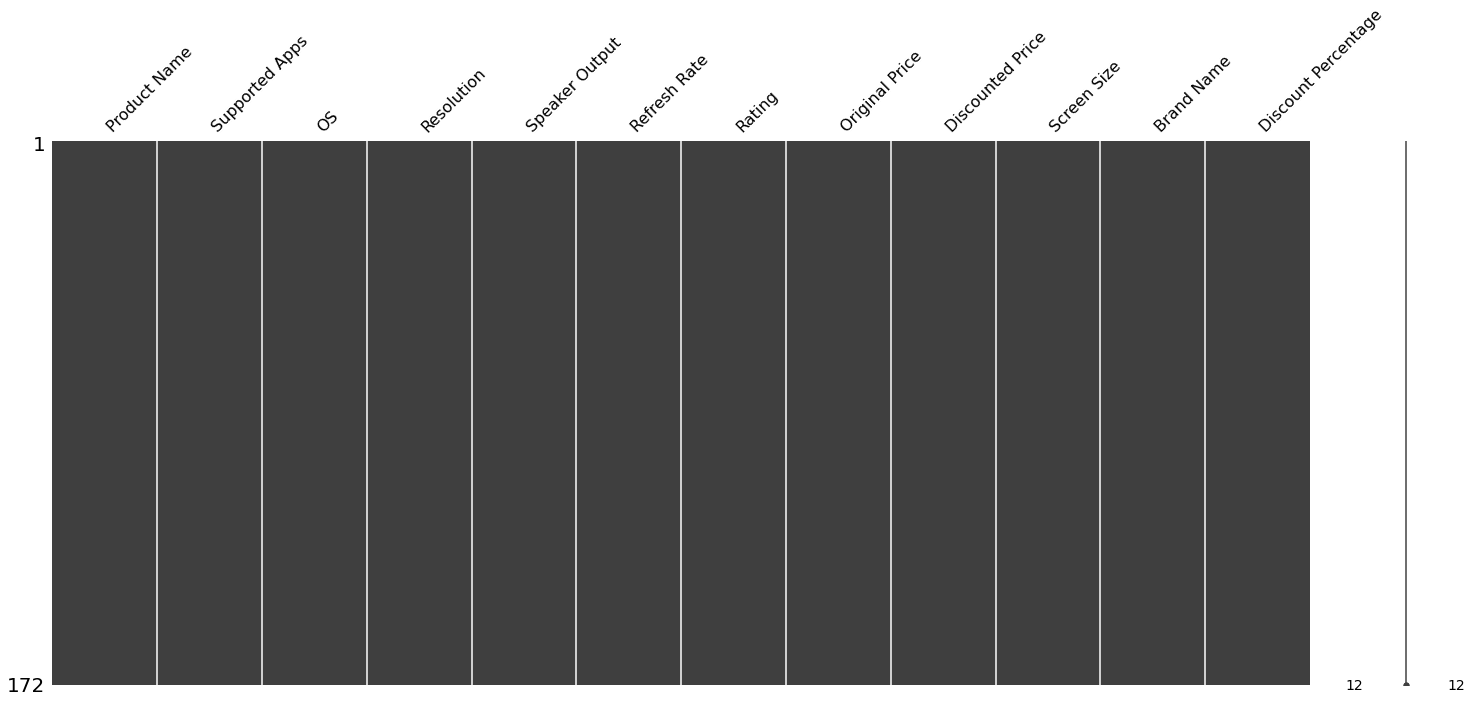

In [85]:
# to view any null in matrix, a data-dense display which lets us quickly visually 
# pick out patterns in data completion. 

plt.figure(figsize=(3,2))
mino.matrix(df_TV)

#### Re-Arranging Columns for Better View

In [86]:
df_TV=df_TV.reindex(columns= ['Brand Name','Screen Size','Discounted Price','Original Price','Discount Percentage','Rating','Supported Apps','OS','Speaker Output','Resolution','Refresh Rate','Product Name'])
df_TV


,Brand Name,Screen Size,Discounted Price,Original Price,Discount Percentage,Rating,Supported Apps,OS,Speaker Output,Resolution,Refresh Rate,Product Name
0,VU,55.0,43999.0,56000.0,21.0,4.4,Netflix|Prime Video|Disney+Hotstar|Youtube,Android,30 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,Vu Premium 139 cm (55 inch) Ultra HD (4K) LED ...
1,IFFALCON,55.0,36999.0,106990.0,65.0,4.3,Netflix|Disney+Hotstar|Youtube,Android,30 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,iFFALCON by TCL 138.6 cm (55 inch) Ultra HD (4...
2,IFFALCON,43.0,29999.0,47990.0,37.0,4.2,Netflix|Disney+Hotstar|Youtube,Android,24 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,iFFALCON by TCL 108 cm (43 inch) Ultra HD (4K)...
3,REALME,55.0,44999.0,69999.0,36.0,4.3,Netflix|Prime Video|Disney+Hotstar|Youtube,Android,24 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,realme SLED 139 cm (55 inch) Ultra HD (4K) LED...
4,TOSHIBA,43.0,30999.0,39990.0,22.0,4.3,Netflix|Prime Video|Youtube,VIDAA,24 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,TOSHIBA U50 Series 108 cm (43 inch) Ultra HD (...
...,...,...,...,...,...,...,...,...,...,...,...,...
167,SAMSUNG,49.0,69990.0,129900.0,46.0,4.4,Netflix|Disney+Hotstar|Youtube,Tizen,40 W,Ultra HD (4K) 3840 x 2160 Pixels,100 Hz Refresh Rate,SAMSUNG Series 8 123 cm (49 inch) Ultra HD (4K...
168,VU,75.0,84999.0,130000.0,35.0,4.2,Netflix|Youtube,Linux,30 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,Vu Pixelight 189 cm (75 inch) Ultra HD (4K) LE...
169,SAMSUNG,49.0,48355.0,79900.0,39.0,4.6,Netflix|Disney+Hotstar|Youtube,Tizen,20 W,Ultra HD (4K) 3840 x 2160 Pixels,100 Hz Refresh Rate,SAMSUNG 124.4 cm (49 inch) Ultra HD (4K) LED S...
170,SAMSUNG,55.0,52150.0,110254.0,53.0,4.7,Netflix|Disney+Hotstar|Youtube,Tizen,20 W,Ultra HD (4K) 3840 x 2160 Pixels,100 Hz Refresh Rate,SAMSUNG 138 cm (55 inch) Ultra HD (4K) LED Sma...


## Exploratory Data Analysis

#### Groupby 'Brand Name' Data

In [90]:
byBrand = pd.DataFrame(df_TV).groupby(['Brand Name'])
byBrand.get_group("TOSHIBA")

,Brand Name,Screen Size,Discounted Price,Original Price,Discount Percentage,Rating,Supported Apps,OS,Speaker Output,Resolution,Refresh Rate,Product Name
4,TOSHIBA,43.0,30999.0,39990.0,22.0,4.3,Netflix|Prime Video|Youtube,VIDAA,24 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,TOSHIBA U50 Series 108 cm (43 inch) Ultra HD (...
57,TOSHIBA,65.0,68999.0,84990.0,19.0,4.5,Netflix|Prime Video|Youtube,VIDAA,24 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,TOSHIBA U79 Series 164 cm (65 inch) Ultra HD (...
71,TOSHIBA,50.0,37999.0,46990.0,19.0,4.3,Netflix|Prime Video|Youtube,VIDAA,30 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,TOSHIBA U50 Series 126 cm (50 inch) Ultra HD (...
159,TOSHIBA,55.0,48999.0,54990.0,11.0,4.5,Netflix|Prime Video|Youtube,VIDAA,24 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,TOSHIBA U79 Series 139 cm (55 inch) Ultra HD (...


#### GroupBy 'Screen Size'

In [91]:
byScreenSize = pd.DataFrame(df_TV).groupby(['Screen Size'])
byScreenSize.get_group(55)

,Brand Name,Screen Size,Discounted Price,Original Price,Discount Percentage,Rating,Supported Apps,OS,Speaker Output,Resolution,Refresh Rate,Product Name
0,VU,55.0,43999.0,56000.0,21.0,4.4,Netflix|Prime Video|Disney+Hotstar|Youtube,Android,30 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,Vu Premium 139 cm (55 inch) Ultra HD (4K) LED ...
1,IFFALCON,55.0,36999.0,106990.0,65.0,4.3,Netflix|Disney+Hotstar|Youtube,Android,30 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,iFFALCON by TCL 138.6 cm (55 inch) Ultra HD (4...
3,REALME,55.0,44999.0,69999.0,36.0,4.3,Netflix|Prime Video|Disney+Hotstar|Youtube,Android,24 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,realme SLED 139 cm (55 inch) Ultra HD (4K) LED...
9,MI,55.0,44999.0,49999.0,10.0,4.4,Netflix|Prime Video|Disney+Hotstar|Youtube,Android Based,20 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,Mi 4X 138.8 cm (55 inch) Ultra HD (4K) LED Sma...
16,THOMSON,55.0,29999.0,49999.0,40.0,4.1,Netflix|Disney+Hotstar|Youtube,Android Based,24 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,Thomson 140 cm (55 inch) Ultra HD (4K) LED Sma...
21,MOTOROLA,55.0,43999.0,61999.0,29.0,4.4,Netflix|Prime Video|Disney+Hotstar|Youtube,Android,50 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,MOTOROLA ZX Pro 139 cm (55 inch) Ultra HD (4K)...
22,IFFALCON,55.0,43699.0,70990.0,38.0,4.2,Netflix|Disney+Hotstar|Youtube,Android,24 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,iFFALCON by TCL 138.6 cm (55 inch) Ultra HD (4...
24,NOKIA,55.0,41999.0,59999.0,30.0,4.3,Netflix|Prime Video|Disney+Hotstar|Youtube,Android,48 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,Nokia 139 cm (55 inch) Ultra HD (4K) LED Smart...
25,ONEPLUS,55.0,52999.0,59999.0,12.0,4.3,Netflix|Prime Video|Disney+Hotstar|Youtube,Android,30 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,OnePlus U1S 139 cm (55 inch) Ultra HD (4K) LED...
27,IFFALCON,55.0,43699.0,70990.0,38.0,4.2,Netflix|Disney+Hotstar|Youtube,Android,24 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,iFFALCON by TCL 138.6 cm (55 inch) Ultra HD (4...


#### GroupBy 'OS'

In [94]:
byOS = pd.DataFrame(df_TV).groupby(['OS'])

In [95]:
for OS, data in byOS:
    print("OS:",OS)
    print("\n")
    print("data:",data)

OS: Android


data:     Brand Name  Screen Size  Discounted Price  Original Price  \
0           VU         55.0           43999.0         56000.0   
1     IFFALCON         55.0           36999.0        106990.0   
2     IFFALCON         43.0           29999.0         47990.0   
3       REALME         55.0           44999.0         69999.0   
5        NOKIA         65.0           64999.0         79999.0   
..         ...          ...               ...             ...   
160   IFFALCON         50.0           37999.0         58990.0   
162      HAIER         55.0           46890.0         89990.0   
163     COOCAA         50.0           28999.0         59990.0   
165   IFFALCON         65.0           67499.0        156990.0   
171         VU         43.0           26990.0         43000.0   

     Discount Percentage  Rating                              Supported Apps  \
0                   21.0     4.4  Netflix|Prime Video|Disney+Hotstar|Youtube   
1                   65.0     4.3       

#### GroupBy 'Speaker Output'

In [100]:
bySpeakerOp =df_TV.groupby(['Brand Name','Speaker Output'])['Speaker Output'].count()
bySpeakerOp

Brand Name  Speaker Output
COOCAA      16 W               1
            20 W               5
HAIER       20 W               3
            30 W               2
IFFALCON    16 W               3
            20 W               5
            24 W              10
            30 W              14
LLOYD       30 W               3
MI          20 W               4
MICROMAX    20 W               1
            30 W               2
MOTOROLA    20 W               2
            30 W               5
            50 W               3
NOKIA       39 W               1
            48 W               3
ONEPLUS     30 W               2
            50 W               2
ONIDA       16 W               1
            20 W               4
PHILIPS     20 W               4
REALME      24 W               1
SAMSUNG     20 W              46
            40 W              17
THOMSON     24 W               3
TOSHIBA     24 W               3
            30 W               1
VU          20 W               2
            24 W

#### Count of 'Screen Size Vs Brand Name'

In [102]:
df_TV.groupby(['Brand Name','Screen Size'])['Screen Size'].count()

Brand Name  Screen Size
COOCAA      43.0            1
            50.0            3
            55.0            2
HAIER       43.0            1
            50.0            2
            55.0            2
IFFALCON    43.0            3
            50.0            2
            55.0           17
            65.0            8
            75.0            2
LLOYD       43.0            1
            50.0            1
            65.0            1
MI          43.0            1
            50.0            1
            55.0            2
MICROMAX    43.0            1
            49.0            1
            55.0            1
MOTOROLA    43.0            2
            50.0            3
            55.0            3
            65.0            1
            75.0            1
NOKIA       43.0            1
            50.0            1
            55.0            1
            65.0            1
ONEPLUS     55.0            4
ONIDA       42.0            1
            43.0            1
            50.0

#### Pivot Data for 'Screen Size over Brand Name'

In [107]:
pivotScSize = pd.DataFrame(columns=['Brand Name','Screen Size','OS'])
pivotScSize['Brand Name'] = df_TV['Brand Name']
pivotScSize['Screen Size'] = df_TV['Screen Size']
pivotScSize['OS'] = df_TV['OS']

In [108]:
print(pivotScSize.groupby(['Brand Name','Screen Size'],as_index = False).count().pivot('Brand Name','Screen Size').fillna(0))

              OS                                            
Screen Size 42.0  43.0 49.0  50.0  55.0 58.0  65.0 75.0 85.0
Brand Name                                                  
COOCAA       0.0   1.0  0.0   3.0   2.0  0.0   0.0  0.0  0.0
HAIER        0.0   1.0  0.0   2.0   2.0  0.0   0.0  0.0  0.0
IFFALCON     0.0   3.0  0.0   2.0  17.0  0.0   8.0  2.0  0.0
LLOYD        0.0   1.0  0.0   1.0   0.0  0.0   1.0  0.0  0.0
MI           0.0   1.0  0.0   1.0   2.0  0.0   0.0  0.0  0.0
MICROMAX     0.0   1.0  1.0   0.0   1.0  0.0   0.0  0.0  0.0
MOTOROLA     0.0   2.0  0.0   3.0   3.0  0.0   1.0  1.0  0.0
NOKIA        0.0   1.0  0.0   1.0   1.0  0.0   1.0  0.0  0.0
ONEPLUS      0.0   0.0  0.0   0.0   4.0  0.0   0.0  0.0  0.0
ONIDA        1.0   1.0  0.0   1.0   0.0  2.0   0.0  0.0  0.0
PHILIPS      0.0   0.0  0.0   1.0   0.0  1.0   2.0  0.0  0.0
REALME       0.0   0.0  0.0   0.0   1.0  0.0   0.0  0.0  0.0
SAMSUNG      0.0  15.0  6.0  12.0  18.0  1.0  11.0  0.0  0.0
THOMSON      0.0   0.0  

#### Crosstab of 'Supported Apps over Brand Name'

In [109]:
pd.crosstab(df_TV['Supported Apps'],df_TV['Brand Name'])

Brand Name,COOCAA,HAIER,IFFALCON,LLOYD,MI,MICROMAX,MOTOROLA,NOKIA,ONEPLUS,ONIDA,PHILIPS,REALME,SAMSUNG,THOMSON,TOSHIBA,VU
Supported Apps,,,,,,,,,,,,,,,,
Disney+Hotstar|Youtube,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,5
Netflix|Disney+Hotstar|Youtube,0,0,27,0,1,3,0,0,0,0,0,0,46,2,0,5
Netflix|Prime Video|Apple TV|Disney+Hotstar|Youtube,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0
Netflix|Prime Video|Disney+Hotstar|Youtube,5,3,5,0,2,0,10,4,4,0,0,1,8,0,0,5
Netflix|Prime Video|Youtube,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2
Netflix|Youtube,0,2,0,3,0,0,0,0,0,0,4,0,0,0,0,4
Prime Video|Disney+Hotstar|Youtube,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Unknown,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
Youtube,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#### Crosstab of 'OS over Brand Name'

In [110]:
pd.crosstab(df_TV['OS'],df_TV['Brand Name'])

Brand Name,COOCAA,HAIER,IFFALCON,LLOYD,MI,MICROMAX,MOTOROLA,NOKIA,ONEPLUS,ONIDA,PHILIPS,REALME,SAMSUNG,THOMSON,TOSHIBA,VU
OS,,,,,,,,,,,,,,,,
Android,5,5,32,0,3,3,10,4,4,4,0,1,0,1,0,15
Android Based,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0
Linux,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5
Linux based,0,0,0,3,0,0,0,0,0,0,4,0,0,0,0,1
Tizen,0,0,0,0,0,0,0,0,0,0,0,0,62,0,0,0
Unknown,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
VIDAA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0


#### Crosstab of 'Screen Size over Brand Name'

In [111]:
pd.crosstab(df_TV['Brand Name'],df_TV['Screen Size'])

Screen Size,42.0,43.0,49.0,50.0,55.0,58.0,65.0,75.0,85.0
Brand Name,,,,,,,,,
COOCAA,0,1,0,3,2,0,0,0,0
HAIER,0,1,0,2,2,0,0,0,0
IFFALCON,0,3,0,2,17,0,8,2,0
LLOYD,0,1,0,1,0,0,1,0,0
MI,0,1,0,1,2,0,0,0,0
MICROMAX,0,1,1,0,1,0,0,0,0
MOTOROLA,0,2,0,3,3,0,1,1,0
NOKIA,0,1,0,1,1,0,1,0,0
ONEPLUS,0,0,0,0,4,0,0,0,0


#### Crosstab of 'Rating over Brand Name'

In [114]:
pd.crosstab(df_TV['Rating'],df_TV['Brand Name'])

Brand Name,COOCAA,HAIER,IFFALCON,LLOYD,MI,MICROMAX,MOTOROLA,NOKIA,ONEPLUS,ONIDA,PHILIPS,REALME,SAMSUNG,THOMSON,TOSHIBA,VU
Rating,,,,,,,,,,,,,,,,
4.0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0
4.1,0,1,1,0,0,2,0,0,0,1,0,0,4,2,0,1
4.2,1,0,12,0,0,0,1,0,0,4,2,0,7,0,0,1
4.3,5,1,11,1,0,1,6,4,2,0,0,1,8,0,2,3
4.4,0,0,5,1,4,0,3,0,0,0,0,0,10,1,0,13
4.5,0,0,3,0,0,0,0,0,1,0,0,0,9,0,2,0
4.6,0,2,0,0,0,0,0,0,0,0,0,0,11,0,0,3
4.7,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0
4.8,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0


#### Checking for Displaying Values Extraction

In [113]:
display(df_TV.loc[(df_TV["Rating"] == 5.0)])

,Brand Name,Screen Size,Discounted Price,Original Price,Discount Percentage,Rating,Supported Apps,OS,Speaker Output,Resolution,Refresh Rate,Product Name
14,PHILIPS,65.0,79999.0,199990.0,60.0,5.0,Netflix|Youtube,Linux based,20 W,Ultra HD (4K) 3840 x 2160 Pixels,64 Hz Refresh Rate,PHILIPS 164 cm (65 inch) Ultra HD (4K) LED Sma...
29,PHILIPS,65.0,79999.0,199990.0,60.0,5.0,Netflix|Youtube,Linux based,20 W,Ultra HD (4K) 3840 x 2160 Pixels,64 Hz Refresh Rate,PHILIPS 164 cm (65 inch) Ultra HD (4K) LED Sma...
93,SAMSUNG,65.0,224999.0,279900.0,20.0,5.0,Netflix|Disney+Hotstar|Youtube,Tizen,40 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,SAMSUNG Q70RAK 163 cm (65 inch) QLED Ultra HD ...
98,SAMSUNG,55.0,79990.0,92900.0,14.0,5.0,Netflix|Disney+Hotstar|Youtube,Tizen,20 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,SAMSUNG 139 cm (55 inch) Ultra HD (4K) LED Sma...
100,SAMSUNG,65.0,179999.0,374900.0,52.0,5.0,Netflix|Disney+Hotstar|Youtube,Tizen,40 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,SAMSUNG Q Series 163 cm (65 inch) QLED Ultra H...
141,ONEPLUS,55.0,84899.0,99900.0,15.0,5.0,Netflix|Prime Video|Disney+Hotstar|Youtube,Android,50 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,OnePlus Q1 Series 138.8 cm (55 inch) QLED Ultr...
145,SAMSUNG,55.0,119000.0,169900.0,30.0,5.0,Netflix|Disney+Hotstar|Youtube,Tizen,40 W,Ultra HD (4K) 3840 x 2160 Pixels,60 Hz Refresh Rate,SAMSUNG Series 8 138 cm (55 inch) Ultra HD (4K...


#### Exporting Clean Processed Data to WS_TV_DV.CSV for Data Visualization

In [115]:
df_TV.to_csv('WS_TV_DV.csv', index=False)